# Cost Function 그리기

In [8]:
import numpy as np
import matplotlib.pyplot as plt

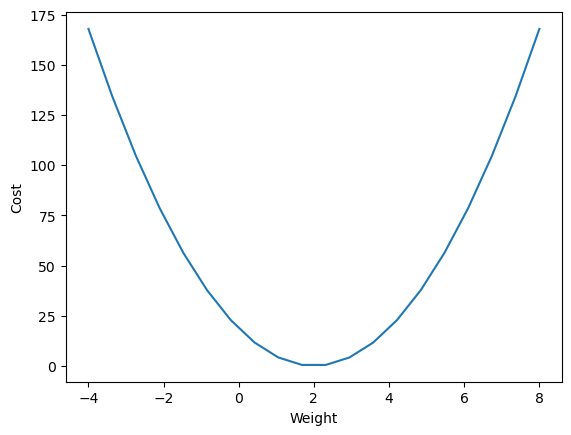

In [14]:
def MSE(w, x, y, b):
    s = 0
    for i in range(len(x)):
        s += (y[i] - (w*x[i]+b))**2 #y_hat = wx+b, (y-y_hat)^2
    return s / len(x)

# y = 2x + 0.1 모델 가정
# w = 2일 때가 Golbal Minimun인 함수
x = [1., 2., 3.] # 입력변수, 독립변수, Feature(특성값)
y = [2.1, 4.1, 6.1] # 출력변수, 종속변수, label(정답)
b = 0.1

w_val = [] # 비용함수 그래프의 x 축의 값
cost_val = [] # 비용함수 그래프의 y 축의 값

for w in np.linspace(-4, 8, 20): # 시작값, 끝값, 균등분할
    c = MSE(w, x, y, b)
    w_val.append(w)
    cost_val.append(c)

plt.plot(w_val, cost_val)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

# 가중치 학습

In [9]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

-0.09027529589850945 0.17055522598064407


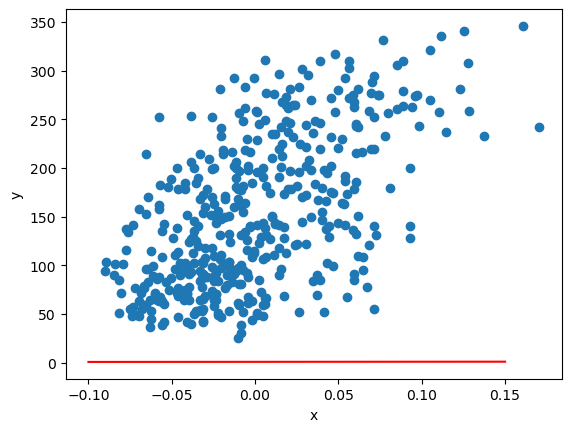

In [3]:
diabetes = load_diabetes() # 당뇨병 환자 데이터 로드
# print(diabetes.DESCR) # 데이터 설명글
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) # data : 독립변수, feature_names : 독립변수 이름
# display(df.head())
sr = pd.Series(diabetes.target) # target : 종속변수
# 종속변수 : 베이스라인 1년 후 질병 진행의 정량적 측정 값
# print(sr[:5])

print(np.min(df['bmi']), np.max(df['bmi'])) # bmi 값 최대 최소

w = 1.0 # 초기 가중치 (임의의 값 설정)
b = 1.0 # 초기 절편 (임의의 값 설정)

pt1 = (-0.1, -0.1*w+b) # 회귀선 시작점 (x,y)
pt2 = (0.15, 0.15*w+b) # 회귀선의 끝점(x, y)

plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]], color ='r') # plot([x좌표 리스트],[y좌표 리스트])
plt.scatter(df['bmi'].values, sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

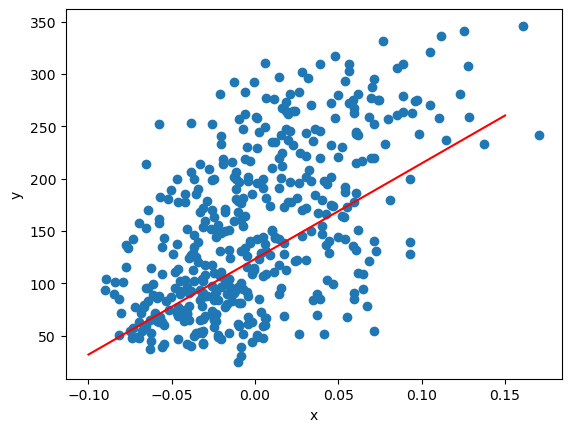

학습된 가중치:913.60
학습된 절편:123.39


In [4]:
x = df['bmi']
y = diabetes.target

w = 1.0
b = 1.0
for i in range(100): # 100번 반복하여 학습
    for x_i, y_i in zip(x,y):
        y_hat = w*x_i + b # 예측값 
        w = w - (y_hat - y_i) * x_i
        b = b - (y_hat - y_i)

pt1 = (-0.1, -0.1*w+b) # 회귀선 시작점 (x,y)
pt2 = (0.15, 0.15*w+b) # 회귀선의 끝점(x, y)

plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]], color ='r') # plot([x좌표 리스트],[y좌표 리스트])
plt.scatter(df['bmi'].values, sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f'학습된 가중치:{w:.2f}')
print(f'학습된 절편:{b:.2f}')

## scikit-learn을 이용한 회귀분석 비교
- scikit-learn : 머신러닝 알고리즘을 제공하는 패키지
- 공식 사이트 : https://scikit-learn.org

추정 계수(가중치): 949.44
절편 : 152.13


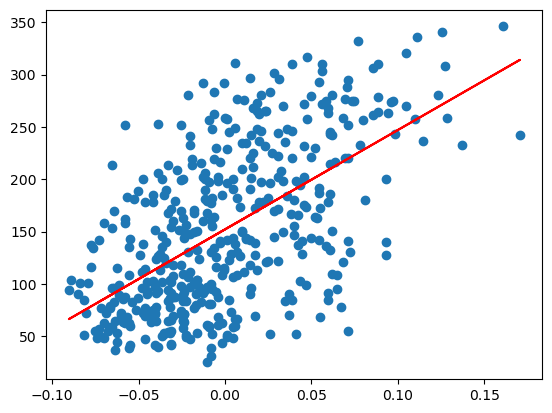

In [9]:
from sklearn.linear_model import LinearRegression # 회귀분석 모델 클래스

#데이터 준비
x = df['bmi'].values.reshape(-1,1) # 열은 1로 맞추고 행은 알아서 지정하라는 명령
y = diabetes.target

 # 선형회귀 모델 준비
model = LinearRegression()

# 학습(fitting)
model.fit(x,y) # y = wx + b

# 예측
y_hat = model.predict(x)

# coef_ : 학습된 가중치의 목록
print(f'추정 계수(가중치): {model.coef_[0]:.2f}')
print(f'절편 : {model.intercept_:.2f}')

plt.plot(x, y_hat, 'r') # 학습된 회귀선
plt.scatter(x, y)
plt.show()

# LinearRegression

(70, 1) (30, 1) (70, 1) (30, 1)
MAE:1.48
RMSE:1.74
R-Square(결정계수):0.94
가중치:[2.242182]
절편:[2.89782929]


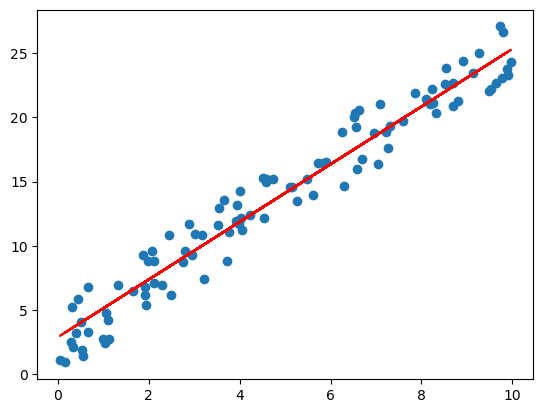

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) 데이터 준비
x = np.random.rand(100,1) * 10 #[0,10) 범위의 100x1 모양의 행렬로 생성
y = (x * 2.3) + np.random.rand(100,1) * 5.4 # 기울기가 2.3이고 y절편의 범위가 대략 5.4
# y = 2.3x + 5.4

# 2) 모델 준비
model = LinearRegression()

# 3) 학습 데이터와 평가 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=10) # train_size = 0.7 둘 중 하나만 지정하면 됨

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 4) 학습(fitting)
model.fit(x_train, y_train)

# 5) 예측 및 평가
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R-Square(결정계수):{r2_score(y_test, y_hat):.2f}')
print(f'가중치:{model.coef_[0]}')
# print(f'가중치: {np.round(model.coef_, 2)}')
print(f'절편:{model.intercept_}')

# 6) 예측결과 시각화
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'r')
plt.show()

[문제] 키와 몸무게 데이터를 이용해 모델을 학습 시킨 후, 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하세요.

In [17]:
df = pd.read_csv('G:/내 드라이브/DIMA4/06. Machine Learning/datasets/body.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  1000 non-null   int64  
 1   Height  1000 non-null   float64
 2   Weight  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


MAE:7.87
RMSE:9.07
R-Square(결정계수):0.04
가중치:[0.58799352]
절편:-29.846705529783648
키 170인 사람의 예측 몸무게 [70.11219281]


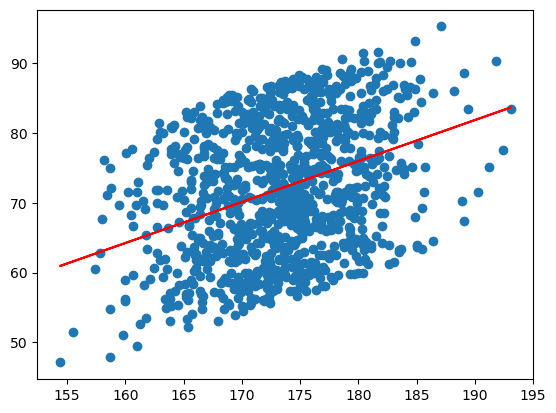

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 준비
df = pd.read_csv('G:/내 드라이브/DIMA4/06. Machine Learning/datasets/body.csv')

x = df['Height'].values.reshape(-1,1)
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# 2) 모델 준비
model = LinearRegression()

# 3) 학습
model.fit(x_train, y_train)

# 4) 예측 및 평가
# 모델 성능을 측정하기 위한 예측
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R-Square(결정계수):{r2_score(y_test, y_hat):.2f}')
print(f'가중치:{model.coef_}')  # print(f'가중치:np.round({model.coef_}, 2)')   # 다변량 데이터일 경우,
print(f'절편:{model.intercept_}')

print('키 170인 사람의 예측 몸무게', model.predict([[170]]))

# 시각화
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [52]:
print(df[df['Height']==170]['Weight'].mean())

70.25714285714285


In [56]:
df[df['Height'].between(169, 171)]['Weight'].mean() # 특정 범위 안의 값인지 체크(불린 값으로 반환)

69.34271844660194

# [실습] 캘리포니아 집값 예측
- 1990년 캘리포니아 블록 그룹마다의 주택 가격 데이터
- housing_median_age : 블록 내 주택의 연령 중앙값
- total_rooms : 블록 내 주택의 총 방의 개수
- total_bedrooms : 블록 내 주택의 총 침실 수
- population : 블록 내 거주 중인 총 주민 수
- households : 블록 내 총 가구 수
- median_income : 블록 내 가구의 소득 중앙값
- median_house_value : 블록 내 가구의 주택 매매가 중앙값 (종속변수)

In [25]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


R스퀘어:0.64


,Predict,Actual
0,378109.13,344700.0
1,171021.00,176500.0
2,297217.00,270500.0
3,269490.07,330000.0
4,108359.00,81700.0
5,89994.00,67000.0
6,90536.00,67000.0
7,154108.00,166900.0
8,162875.00,194400.0
9,140233.00,164200.0


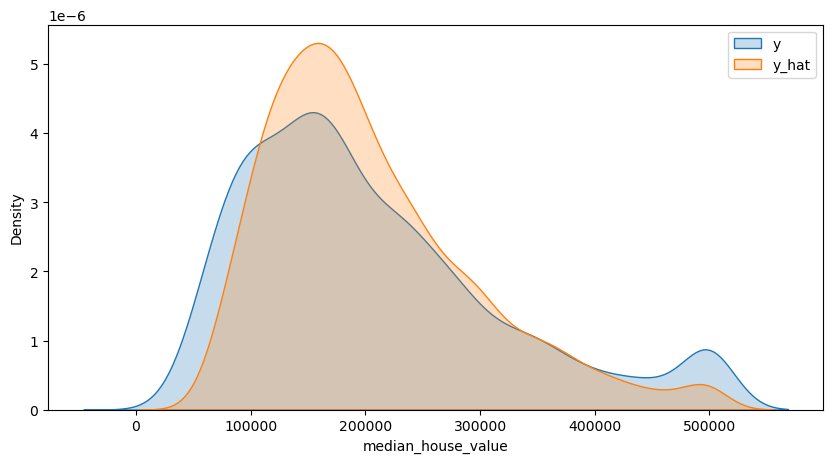

In [88]:
data = pd.read_csv('./datasets/california_housing_train.csv')
print(data.shape)
display(data.head())

features  =['housing_median_age','total_rooms','total_bedrooms',	'population','households','median_income']
x_train = data[features]
y_train = data['median_house_value']

# model = LinearRegression()
# model = SGDRegressor()
model = RandomForestRegressor()

model.fit(x_train, y_train)

data_test = pd.read_csv('./datasets/california_housing_test.csv')
x_test =data_test[features]
y_test = data_test['median_house_value']

y_hat = model.predict(x_test)
print(f'R스퀘어:{r2_score(y_test, y_hat):.2f}')

sr_predict = pd.Series(np.round(y_hat[:10],2))
sr_actual = pd.Series(np.round(y_test[:10],2))
compare_df = pd.DataFrame({'Predict':sr_predict, 'Actual':sr_actual})
display(compare_df)

plt.figure(figsize=(10,5))
# kdeplot : 확률밀도 그래프 -> 히스토그램과 유사하나 각 데이터의 구간별 빈도수를 확률적으로 추정하여 부드러운 곡선으로 표현한다.
sns.kdeplot(y_test, label = 'y', fill=True)
sns.kdeplot(y_hat, label = 'y_hat', fill=True)
plt.legend()
plt.show()

In [76]:
import warnings
warnings.filterwarnings(action = 'ignore')